In [17]:
# !pip install selenium
# !pip install webdriver-manager
# !apt-get update
!pip install chromium-chromedriver	#chrome 설치

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

ERROR: Invalid requirement: '#chrome'


In [26]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

with webdriver.Chrome(service = Service(ChromeDriverManager().install()), chrome_options=chrome_options) as driver:
    driver.get('https://www.weather.go.kr/w/weather/forecast/short-term.do')
    driver.implicitly_wait(1)
    temp = driver.find_element(By.ID, 'my-tchart').text
    temp = temp.replace("℃","").split('\n')
    print(temp)


C:\Users\khyun\AppData\Local\Temp/ipykernel_20848/3988435577.py:6: DeprecationWarning: use options instead of chrome_options
  with webdriver.Chrome(service = Service(ChromeDriverManager().install()), chrome_options=chrome_options) as driver:


['24', '25', '25', '26', '25', '25', '23', '21', '20', '20', '19', '19', '18', '18', '18', '17']


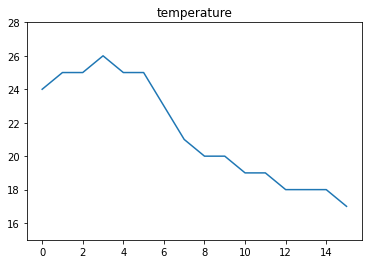

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x = range(len(temp)), y = temp)
plt.ylim(mi , ma)
plt.title('temperature')
plt.show()

In [44]:
temp = [int(t) for t in temp]
mi = int(min(temp))-2
ma = int(max(temp))+2

In [46]:
import requests
from bs4 import BeautifulSoup as bs

In [47]:
user_agent = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36'}

In [53]:
import time
frequency = {}

for i in range(1,11):
    res = requests.get('https://hashcode.co.kr/?page=%d' %i)
    soup = bs(res.text, 'html.parser')
    ul_tags = soup.find_all('ul','question-tags')
    for ul in ul_tags:
        li_tags = ul.find_all('li')
        for li in li_tags :
            tag = li.text.strip()
            if tag in frequency:
                frequency[tag] +=1
            else :
                frequency[tag] = 1
    time.sleep(0.5)


In [57]:
from collections import Counter
counter = Counter(frequency)

In [59]:
x, y = [], []
for i, j in counter.most_common(10):
    x.append(i)
    y.append(j)

    print(x,y)

['python', 'c', 'java', 'c++', 'pandas', 'list', 'selenium', 'android', 'for', 'android-studio'] [242, 42, 34, 23, 18, 15, 12, 12, 10, 9]


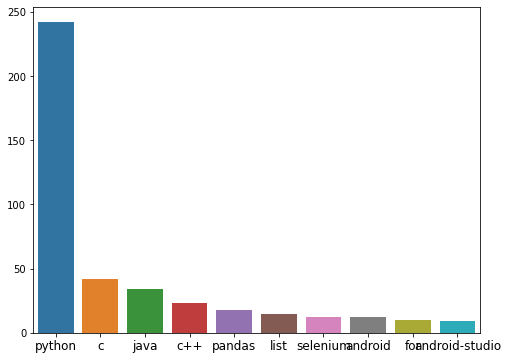

In [84]:
plt.figure(figsize=(8,6))
plt.rc('xtick', labelsize = 12)
sns.barplot(x=x,y=y)

plt.show()